In [11]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from matplotlib.colors import LinearSegmentedColormap

def rollavg_pandas(a,n):
        'Pandas rolling average over data set a with window size n. Returns a centered np array of same size'
        return np.ravel(pd.DataFrame(a).rolling(n, center=True, min_periods=1).mean().to_numpy())

In [12]:
def get_model(p_rate):
    if p_rate == 0.1:
        model_number = 30
    elif p_rate == 0.25:
        model_number = 31 
    elif p_rate == 0.5:
        model_number = 32    
    elif p_rate == 0.75:
        model_number = 33    
    elif p_rate == 0.9:
        model_number = 28    
    elif p_rate == 1.0:
        model_number = 34  
    else:
        model_number = "Error: Invalid penetration rate."
    return model_number

In [13]:
# LOAD THE CORRECT DATA SET AND RETURN IT (WITH ROLLING WINDOW IF NEEDED)
def y_data(model_number, scenario, KPI_data, window):
        file = r"/Users/Chantal/Documents/Deep-QLearning-Agent-for-Traffic-Signal-Control/result_tests_28-30-31-32-33-34/"+str(model_number)+'_'+str(scenario)+KPI_data
        data = np.loadtxt(file, delimiter=',')

        
        global min_val
        global max_val
        episodes = len(data)

        median = np.median(data, axis=0)

        min_val = min(min(median), min_val)
        max_val = max(max(median), max_val)

        return median

In [14]:
def load_fixed_time(scenario, KPI_data, window):
    
    file = r"/Users/Chantal/Documents/Deep-QLearning-Agent-for-Traffic-Signal-Control/result_tests_28-30-31-32-33-34/results_fixed_time/28_"+str(scenario)+KPI_data
    data = np.loadtxt(file, delimiter=',')

    global min_val
    global max_val

    median = np.median(data, axis=0)

    min_val = min(min(median), min_val)
    max_val = max(max(median), max_val)

    if window > 0:
        median = rollavg_pandas(median, window)

    return median



In [19]:
#MAKES PLOTS FOR EACH SCENARIO TYPE & KPI
def plot(scenario, KPI_type):
    p_rates = [0.1, 0.25, 0.5, 0.75, 0.9, 1.0]

    
    if KPI_type == 'queue':
        KPI_data = "\plot_queue_length_data.csv"
        ylabel = "Queue length"
    elif KPI_type == 'CV_delay':
        KPI_data = "\plot_average_CV_delay_data.csv"
        ylabel = "Median CV delay [s]"
    elif KPI_type == 'RV_delay':
        KPI_data = "\plot_average_RV_delay_data.csv"
        ylabel = "Median RV delay [s]"
    elif KPI_type == 'delay':
        KPI_data = "\plot_average_delay_data.csv"
        ylabel = "Median total delay [s]"
    elif KPI_type == 'wait':
        KPI_data = "\plot_cumulative_wait_data.csv"
        ylabel = "Median waiting time [s]"
    else:
        print("Error: Invalid KPI data type")


    if scenario == 0:
        s_type = "low traffic scenario"
    elif scenario == 1:
        s_type = "medium traffic scenario"
    elif scenario == 2:
        s_type = "high traffic scenario"
    elif scenario == 3:
        s_type = "dynamic traffic scenario"
    else:
        s_type = None


    global min_val
    min_val = 0
    global max_val
    max_val = 0

    



    # PLOT ALL SEVEN MODELS TOGETHER

    plt.style.use('ggplot')
    plt.rcParams.update({'font.size': 14})  # set bigger font size
    fig, ax = plt.subplots()
    plt.title(ylabel + " for all penetration rates in the "+s_type)

    # colors = ['#00CCFF', '#000066'] # Experiment with this
    # color_map = LinearSegmentedColormap.from_list('test', colors, N=7)
    # color = iter(color_map(np.linspace(0,1,len(p_rates))))

    color = iter(plt.cm.seismic(np.linspace(0,1,len(p_rates))))
    x = np.arange(0,5400)
    for p in p_rates:
        c = next(color)
        plt.plot(x, y_data(get_model(p), scenario, KPI_data, 20),  c=c, label = "Penetration rate "+str(p))
    plt.plot(x, load_fixed_time(scenario, KPI_data, 20),  c='green', label = "Fixed time controller")


    legend = ax.legend(loc='best', shadow=True, fontsize='medium')
    plt.xlabel('Episode')
    plt.ylabel(ylabel)

    plt.margins(0)
    plt.ylim(min_val - 0.05 * abs(min_val), max_val + 0.05 * abs(max_val))
    fig = plt.gcf()
    fig.set_size_inches(20, 11.25)
    plt.show()

    save_file = r"/Users/Chantal/Documents/Deep-QLearning-Agent-for-Traffic-Signal-Control/result_tests_28-30-31-32-33-34/"+ \
                "plot_"+KPI_type+"_scenario_"+str(scenario)+".png"
    fig.savefig(save_file)

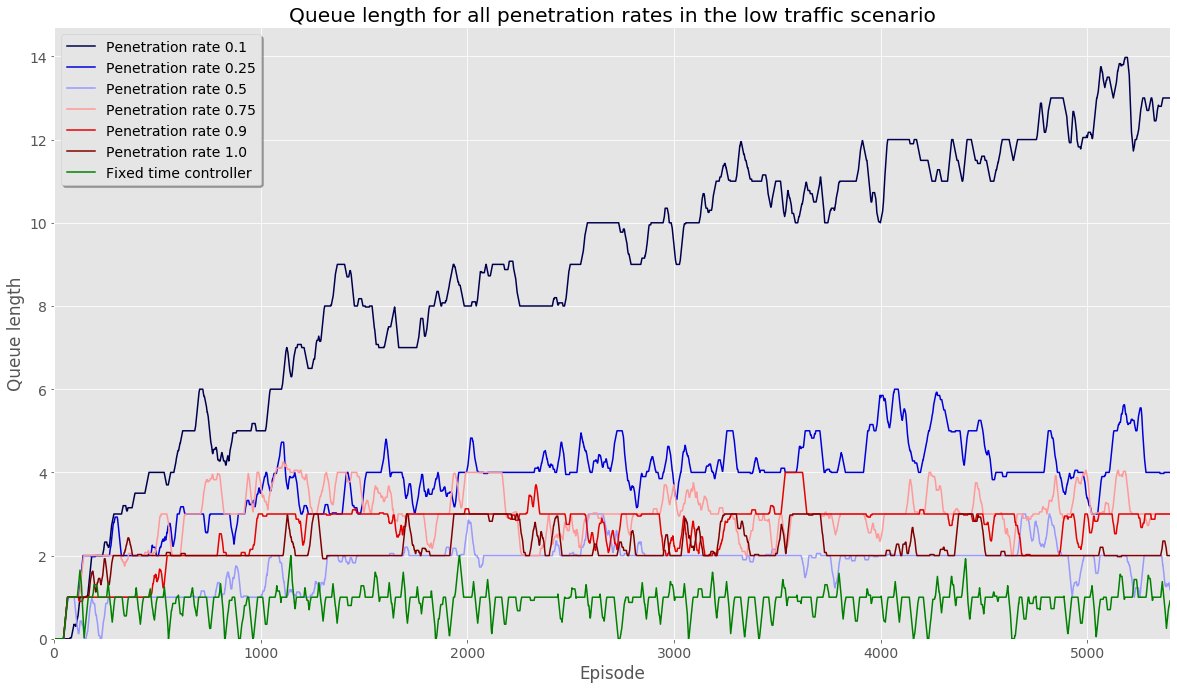

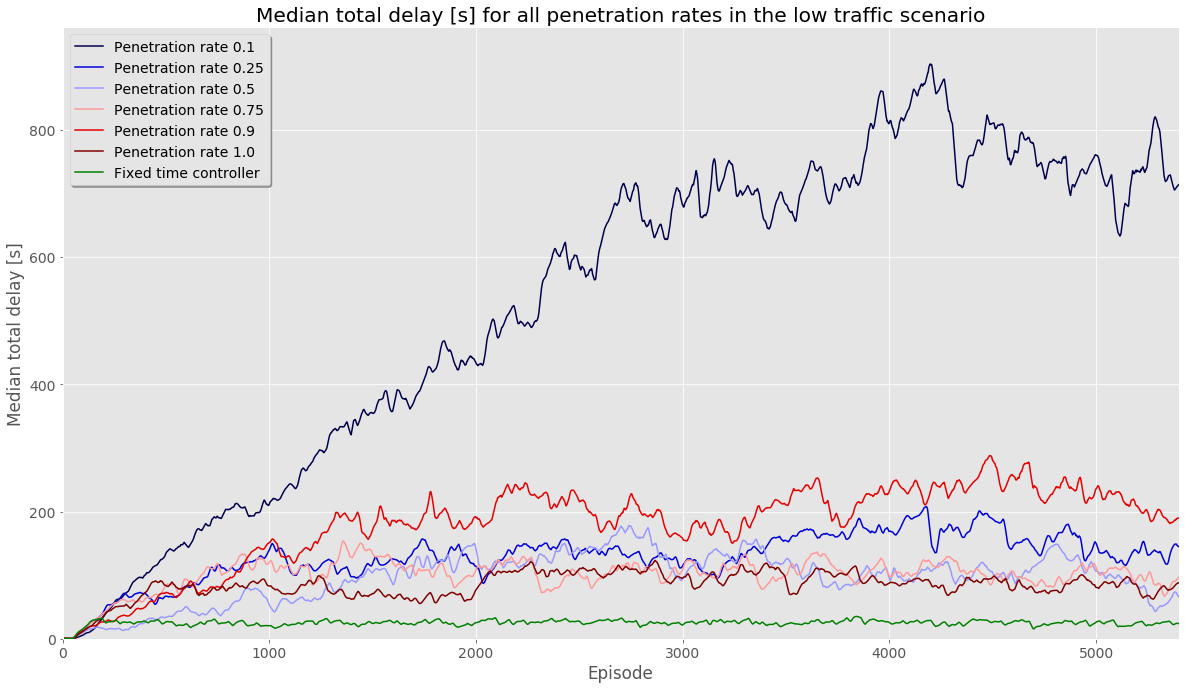

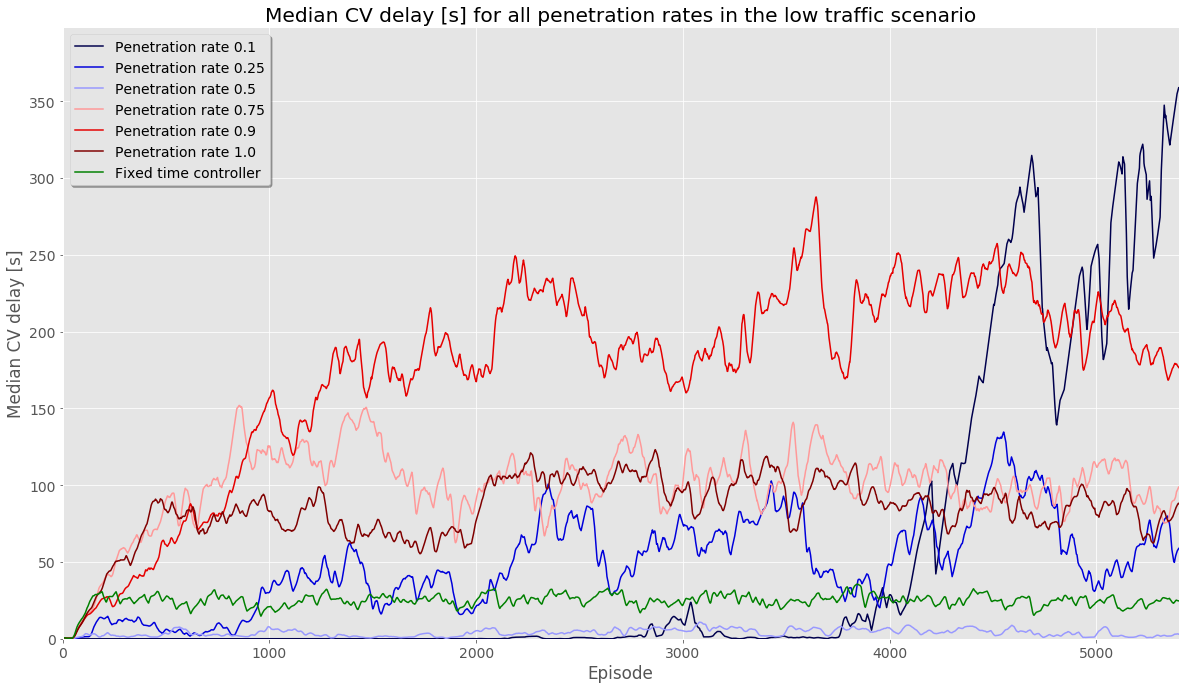

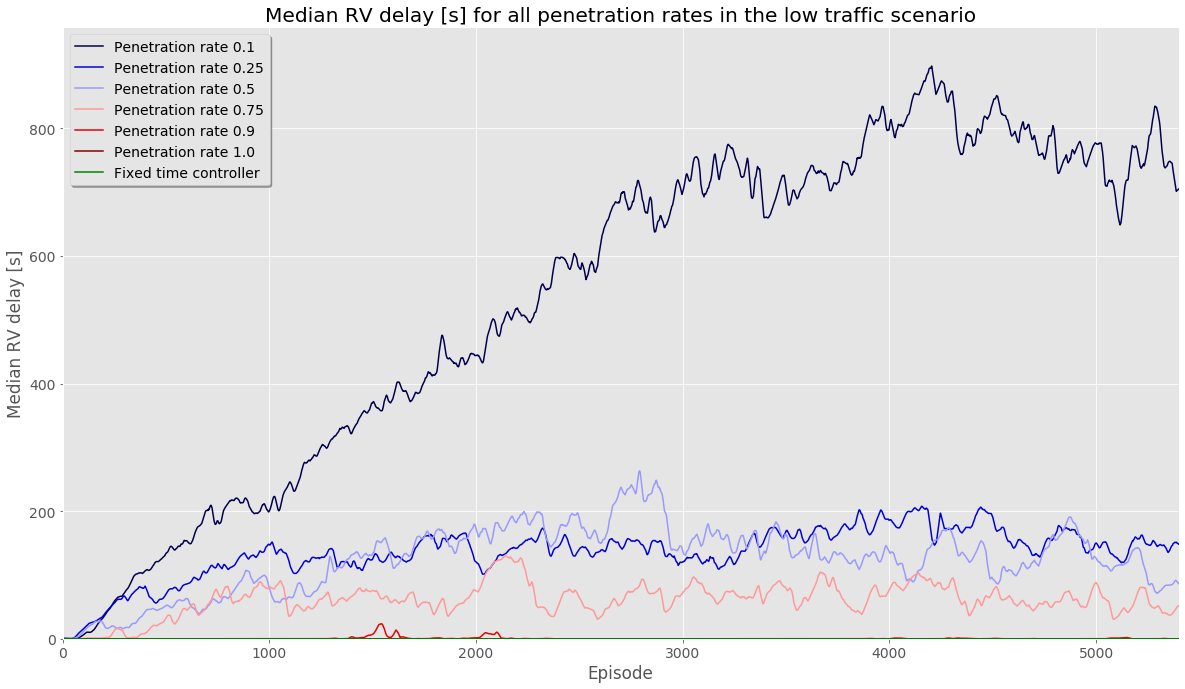

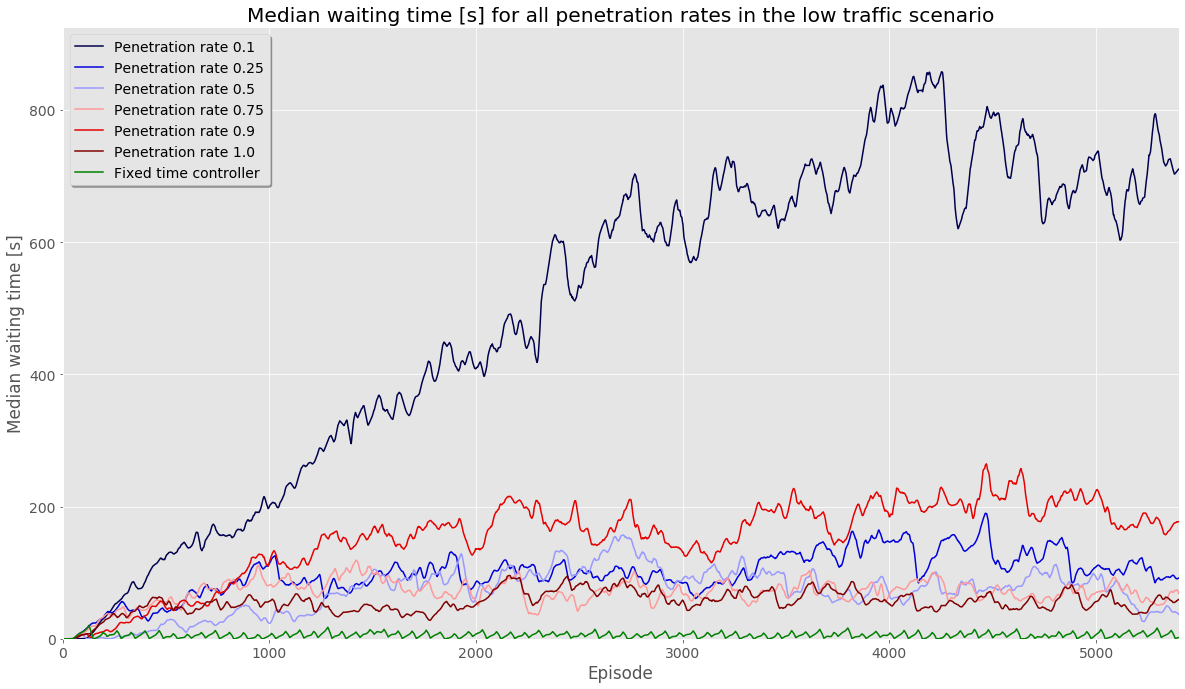

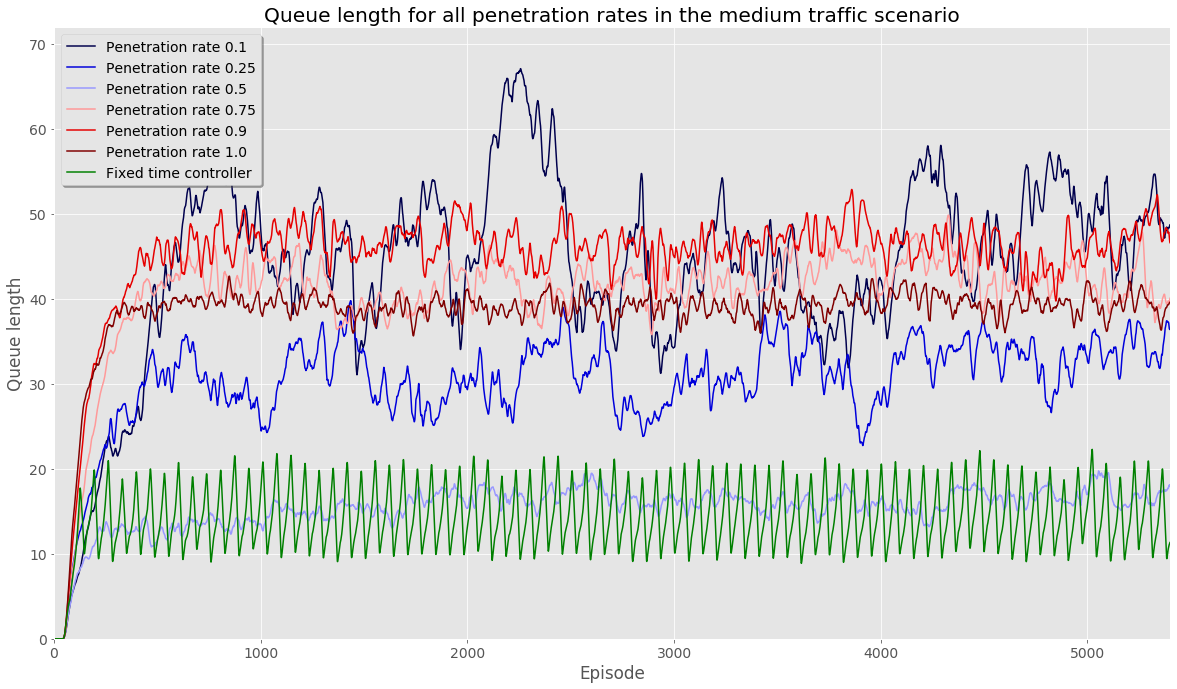

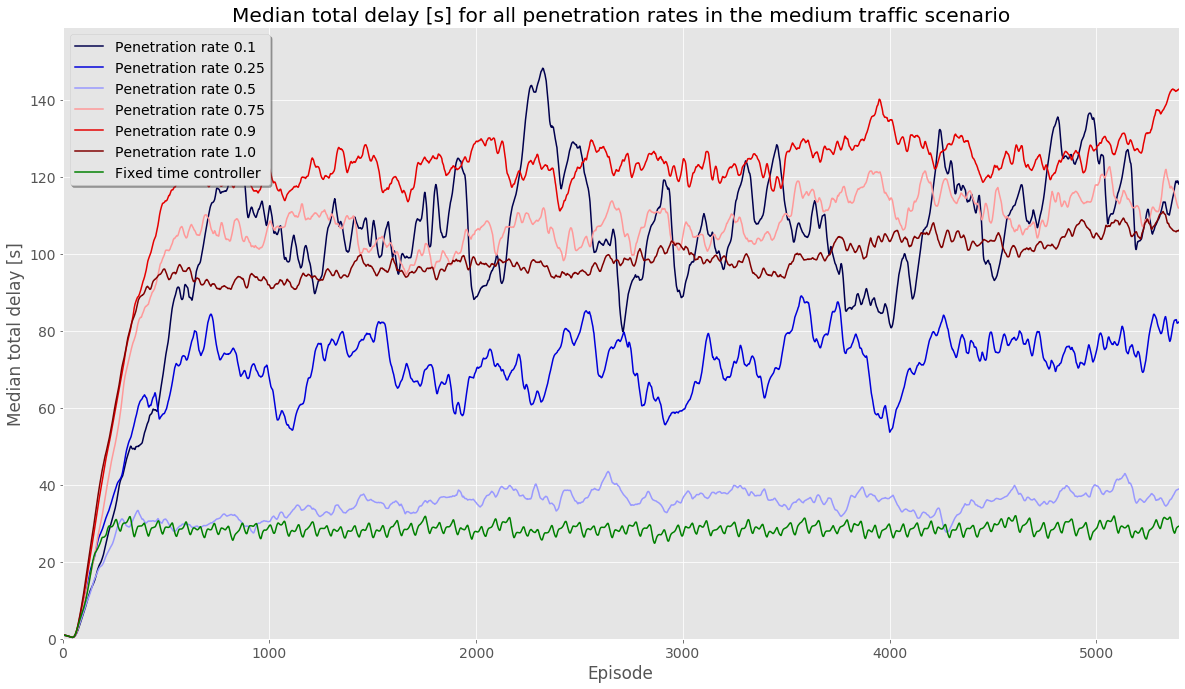

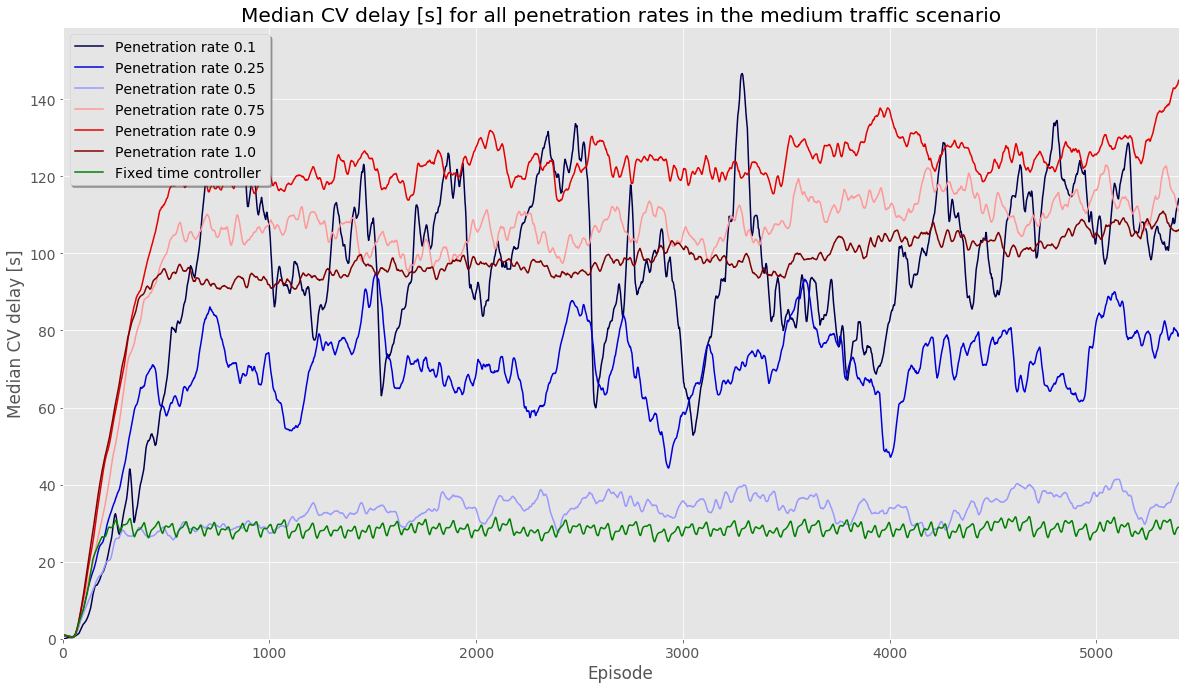

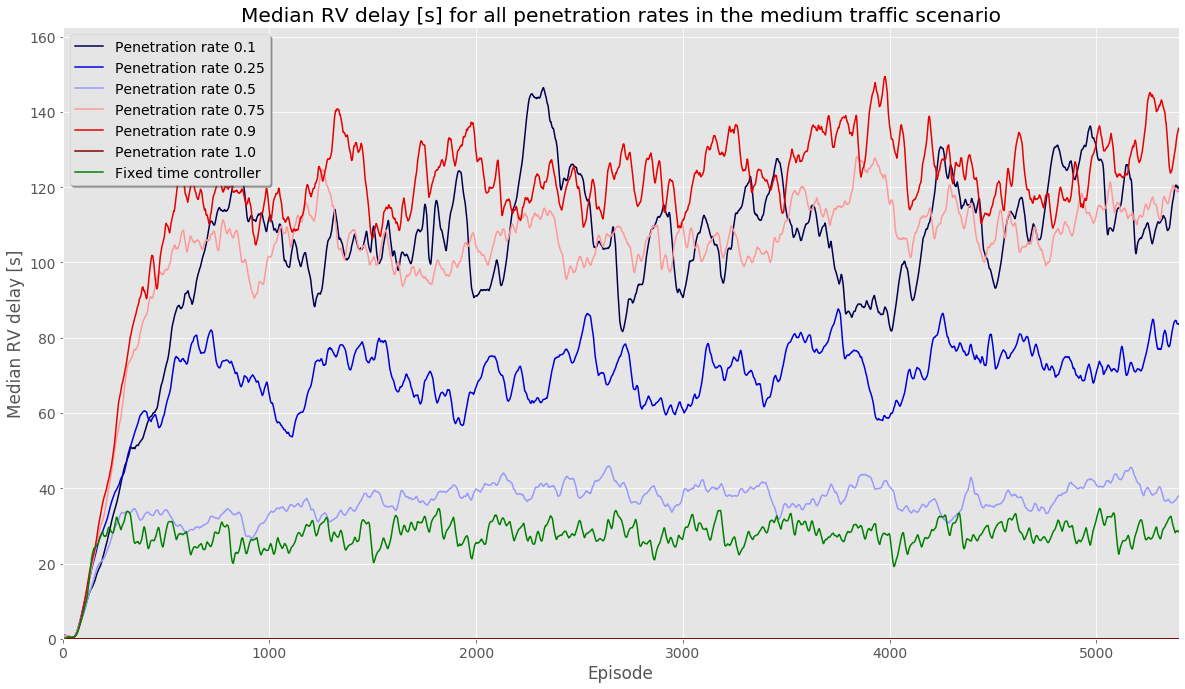

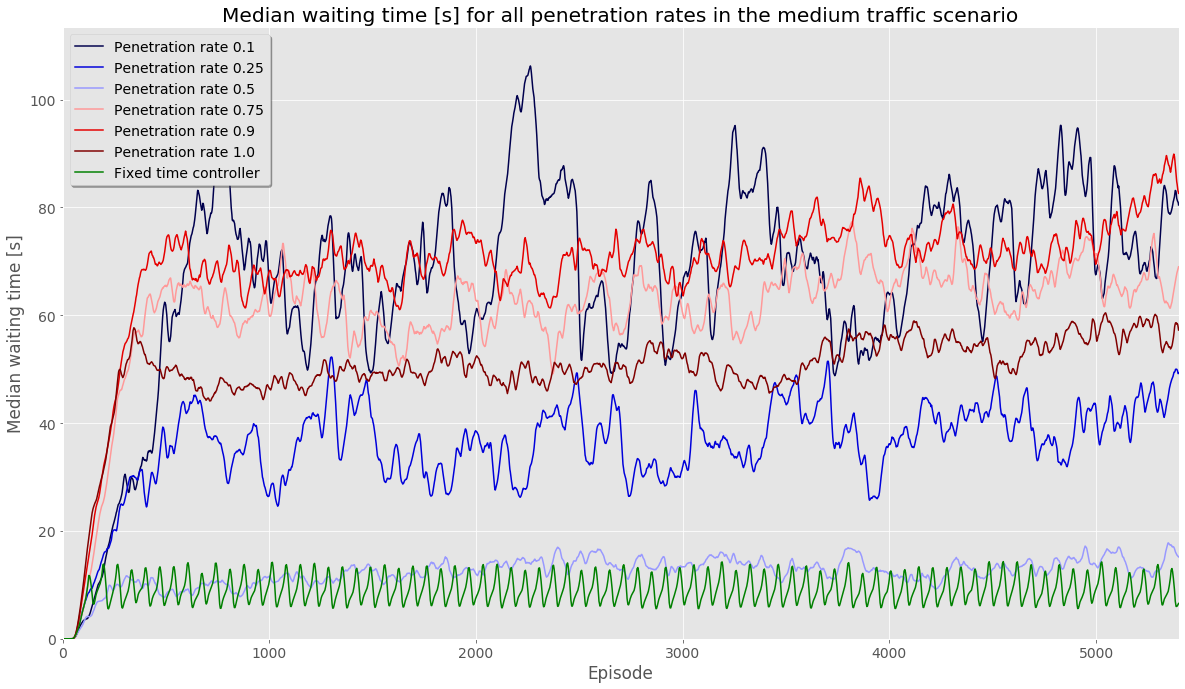

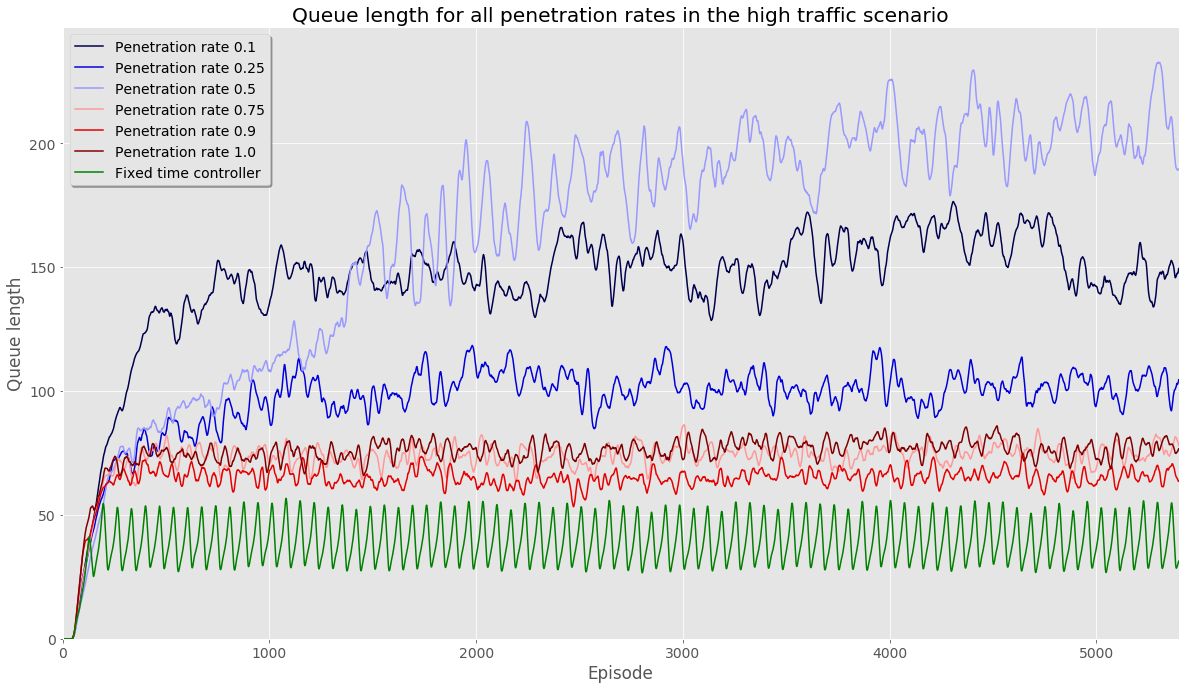

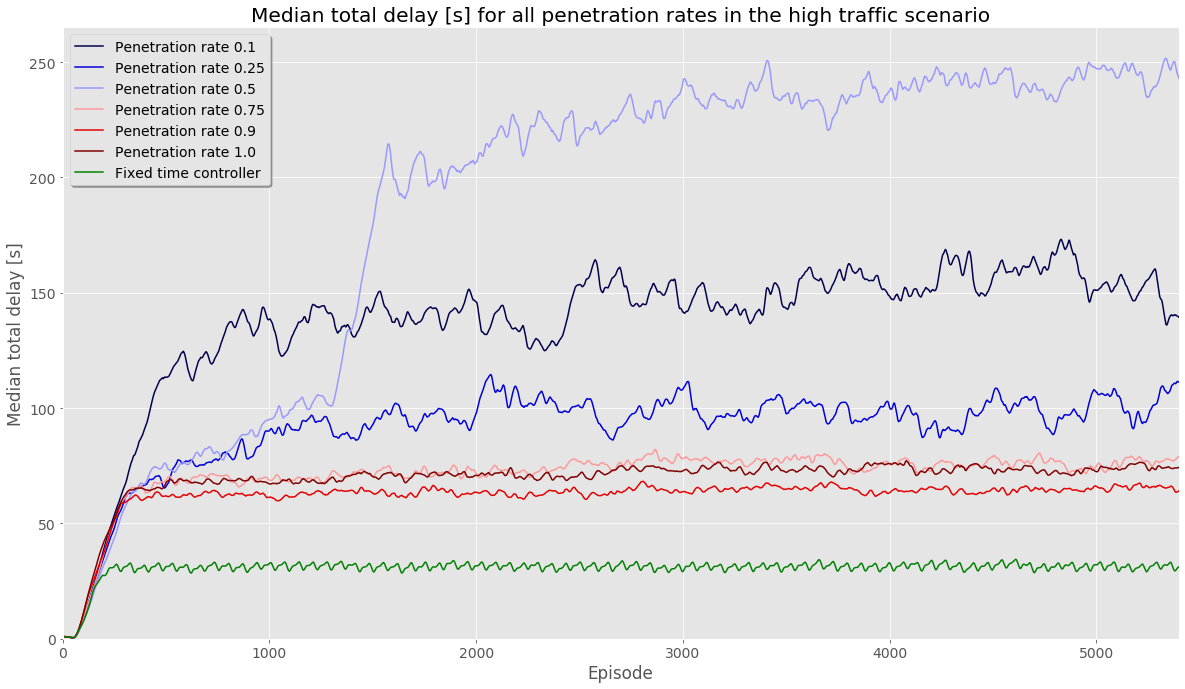

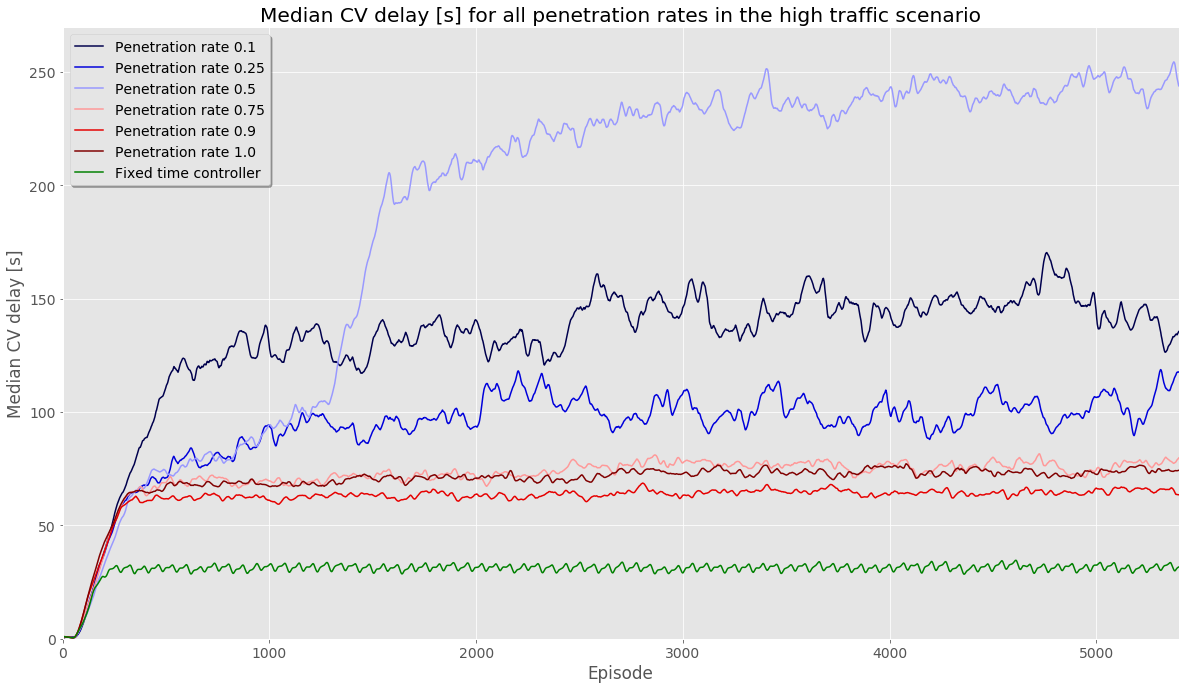

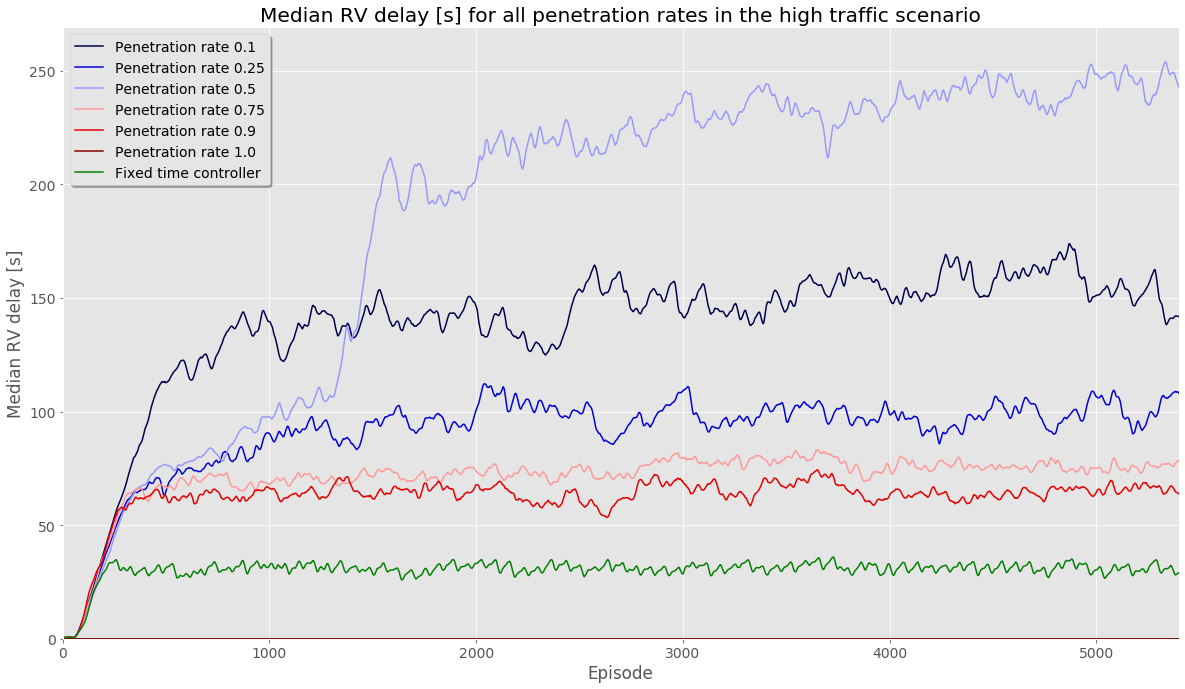

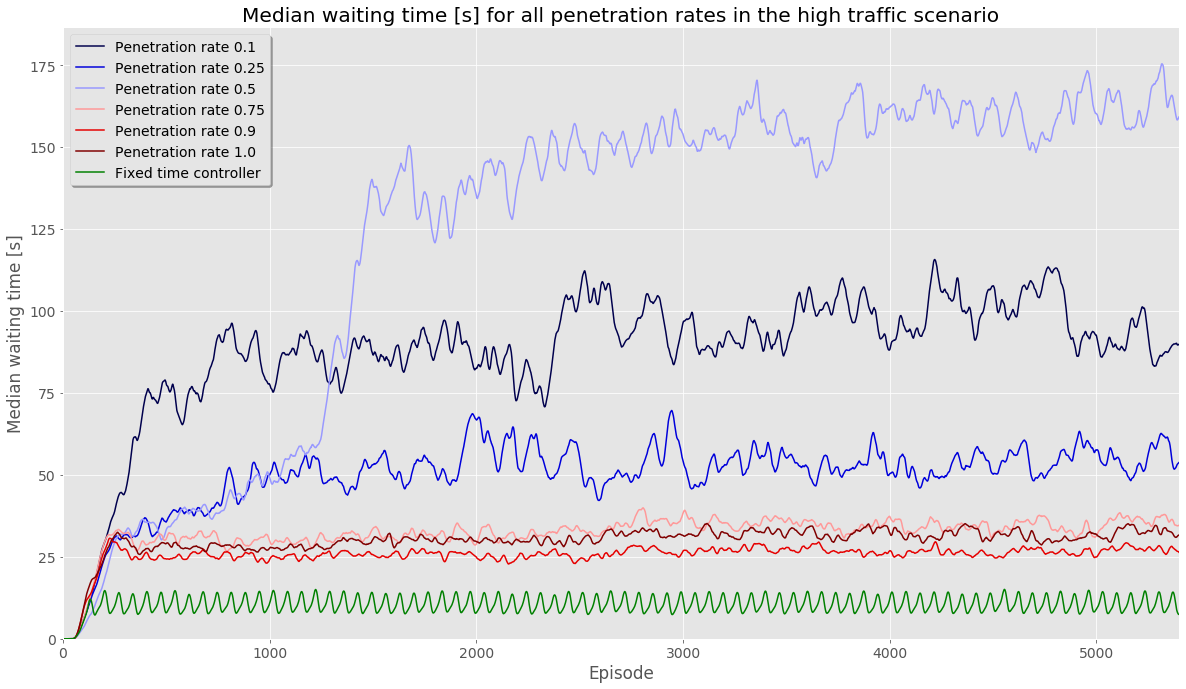

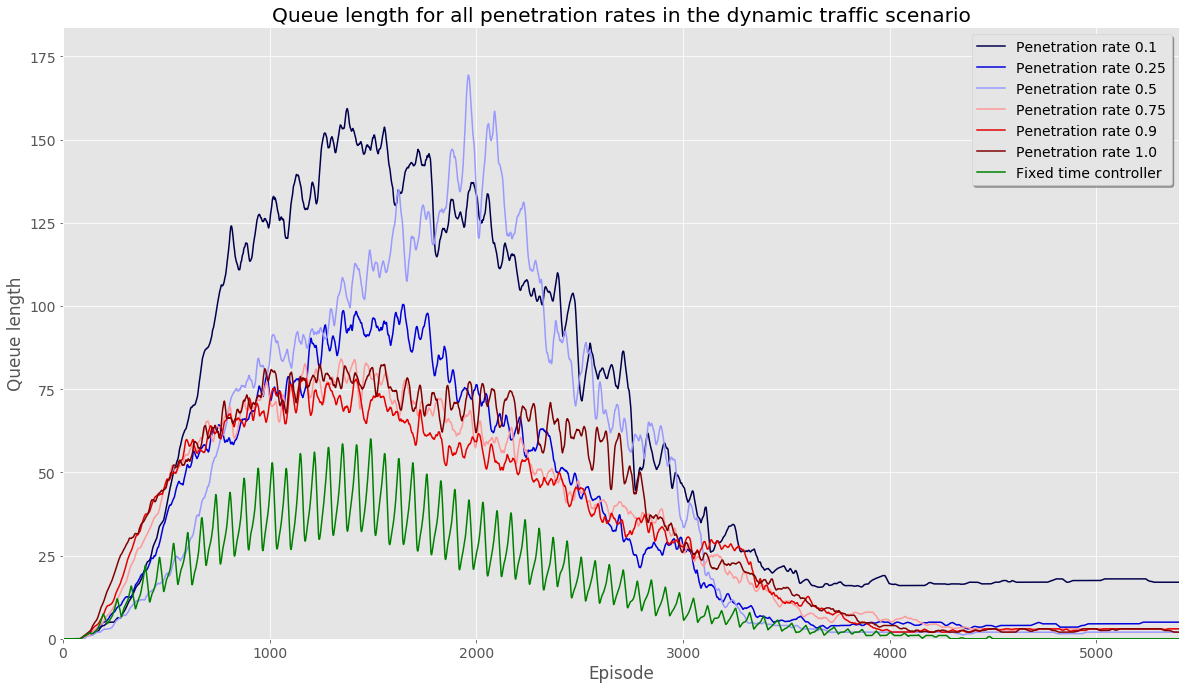

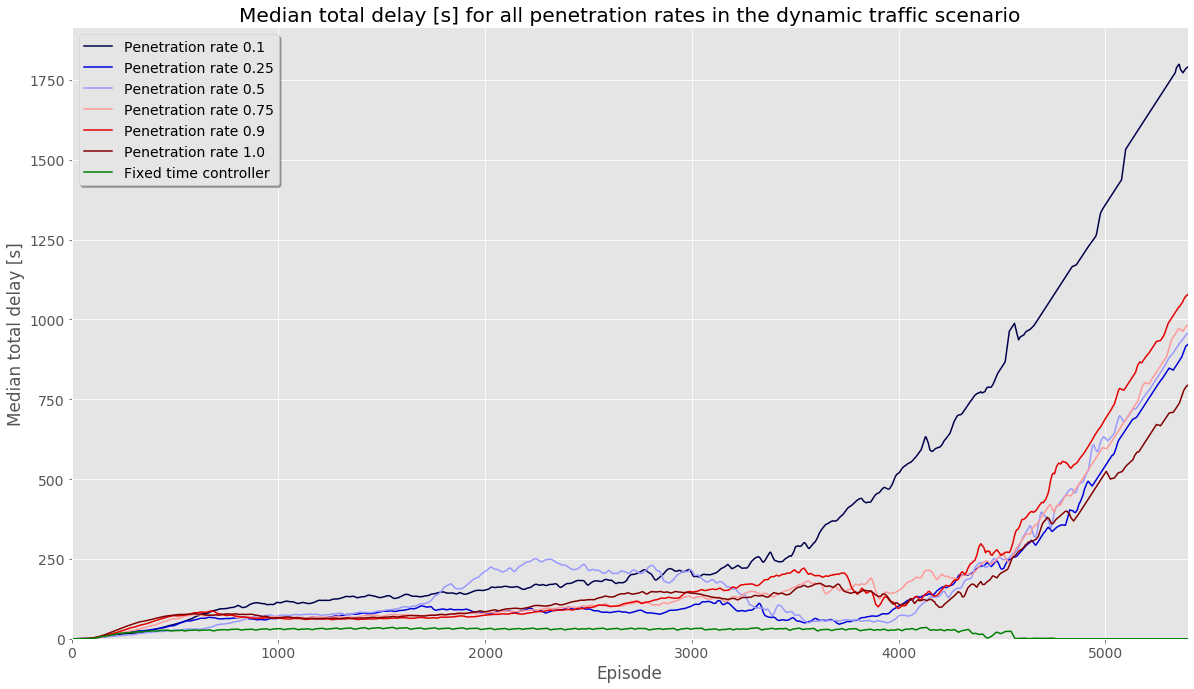

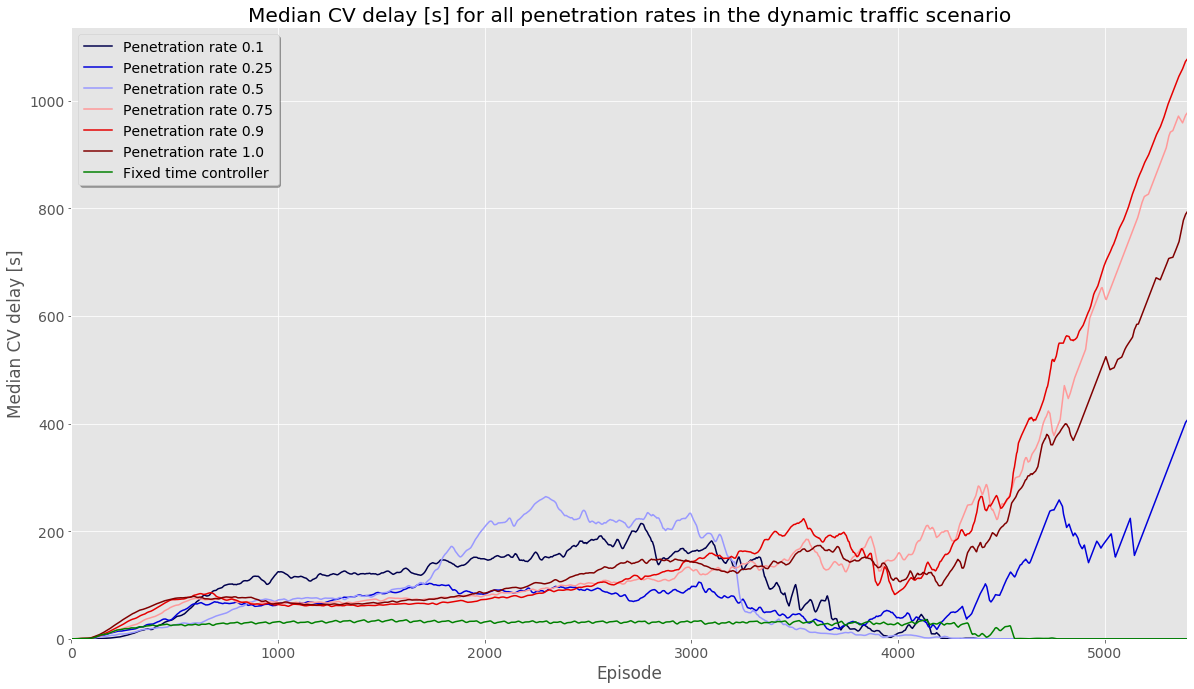

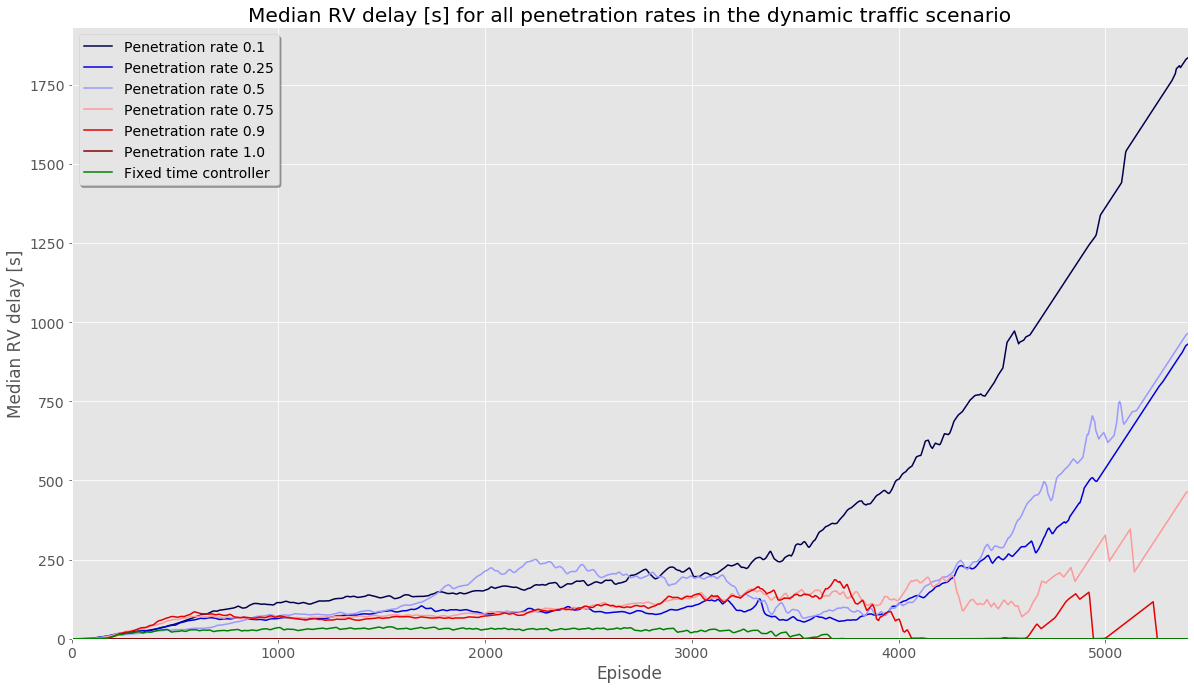

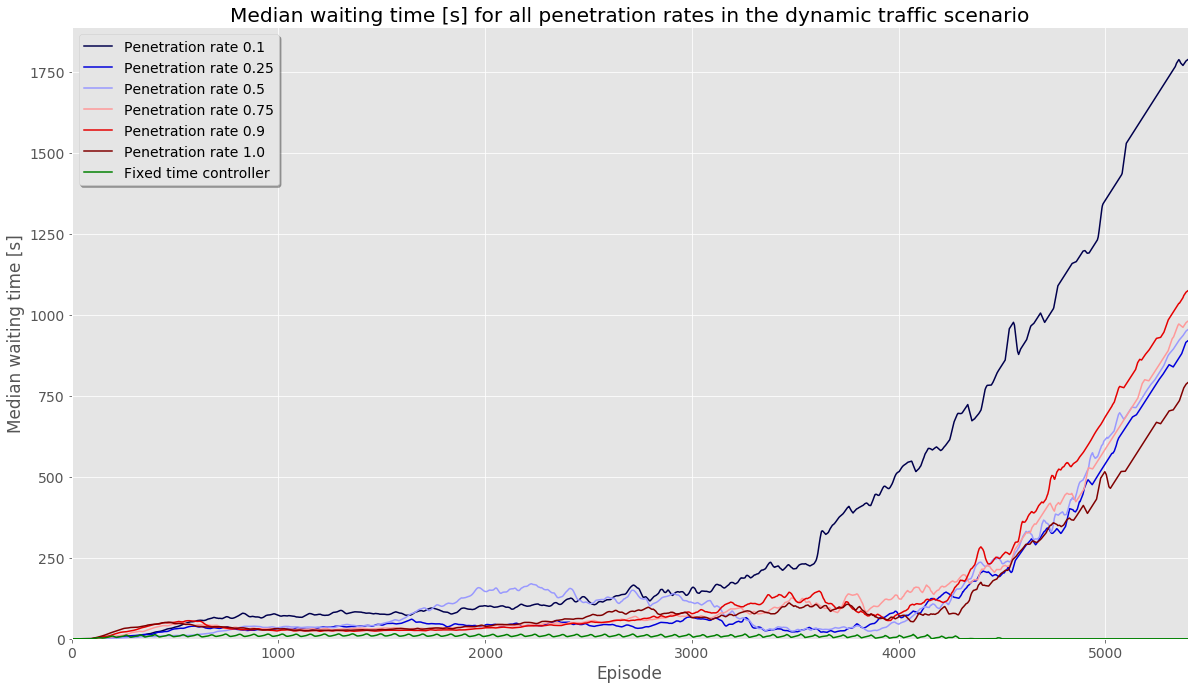

In [22]:
KPI = ['queue', 'delay', 'CV_delay', "RV_delay", 'wait']

for s in range(4):
    for k in KPI:
        plot(s, k)

# plot(2, 'delay')

In [6]:
# CALCULATES THE AVERAGE OF THE MEDIAN OF ONE RUN UNDER A P-RATE, SCENARIO AND KPI
def get_run_average(p_rate, scenario, KPI_type):

    if KPI_type == 'queue':
        KPI_data = "\plot_queue_length_data.csv"
        ylabel = "Queue length"
    elif KPI_type == 'CV_delay':
        KPI_data = "\plot_average_CV_delay_data.csv"
        ylabel = "Median CV delay [s]"
    elif KPI_type == 'RV_delay':
        KPI_data = "\plot_average_RV_delay_data.csv"
        ylabel = "Median RV delay [s]"
    elif KPI_type == 'delay':
        KPI_data = "\plot_average_delay_data.csv"
        ylabel = "Median total delay [s]"
    elif KPI_type == 'wait':
        KPI_data = "\plot_cumulative_wait_data.csv"
        ylabel = "Median waiting time [s]"
    else:
        print("Error: Invalid KPI data type")
 
    all_steps = y_data(get_model(p_rate), scenario, KPI_data, 0) 
    average_all_steps = np.mean(all_steps)
    
    return average_all_steps

In [23]:
# PLOTS THE AVERAGES PER PENETRATION RATE (FOR ALL SCNEARIOS) FOR A CERTAIN KPI


def penetration_rate_curve_plots(KPI_type):
    if KPI_type == 'queue':
        ylabel = "Queue length"
    elif KPI_type == 'CV_delay':
        ylabel = "Median CV delay [s]"
    elif KPI_type == 'RV_delay':
        ylabel = "Median RV delay [s]"
    elif KPI_type == 'delay':
        ylabel = "Median total delay [s]"
    elif KPI_type == 'wait':
        ylabel = "Median waiting time [s]"
    else:
        print("Error: Invalid KPI data type")

    p_rates = [0.1, 0.25, 0.5, 0.75, 0.9, 1.0]
    

    averages_scenario = []
    for scenario in range(4):
        temp = []
        for p in p_rates:
            temp.append(get_run_average(p, scenario, KPI_type))
        averages_scenario.append(temp)



    # PLOT ALL SEVEN MODELS TOGETHER
    plt.style.use('ggplot')
    plt.rcParams.update({'font.size': 14})  # set bigger font size
    fig, ax = plt.subplots()
    plt.title("Average "+ylabel + " for all penetration rates in all traffic scenarios")


    plt.plot(p_rates, averages_scenario[0], c='orange', label="low traffic scenario")
    plt.plot(p_rates, averages_scenario[1], c='red', label="medium traffic scenario")
    plt.plot(p_rates, averages_scenario[2], c='green', label="high traffic scenario")
    plt.plot(p_rates, averages_scenario[3], c='blue', label="dynamic traffic scenario")

    legend = ax.legend(loc='best', shadow=True, fontsize='medium')
    plt.xlabel('CV penetration rate')
    plt.ylabel('Average '+ylabel)

    plt.margins(0)

    min_val = min(min(averages_scenario))
    max_val = max(max(averages_scenario))

    plt.xlim(0, 1)
    plt.ylim(min_val - 0.05 * abs(min_val), max_val + 0.05 * abs(max_val))
    fig = plt.gcf()
    fig.set_size_inches(20, 11.25)
    plt.show()








    save_file = r"/Users/Chantal/Documents/Deep-QLearning-Agent-for-Traffic-Signal-Control/result_tests_28-30-31-32-33-34/penetrationRate_plot_"+ \
                KPI_type+".png"
    fig.savefig(save_file)



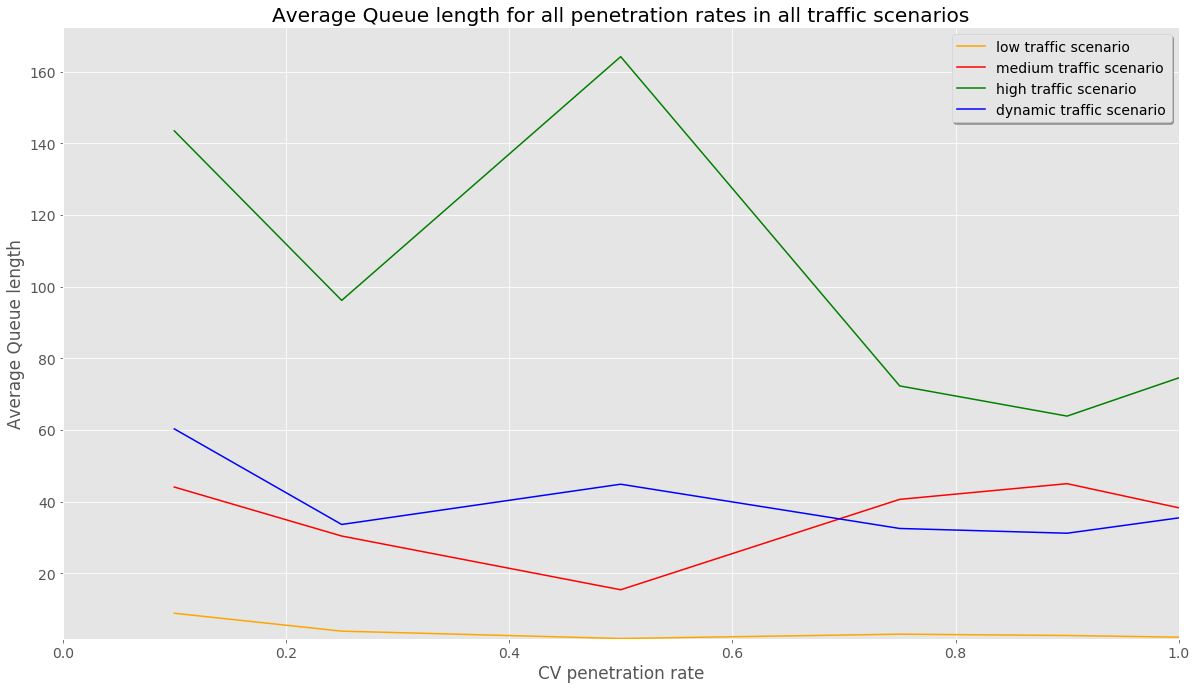

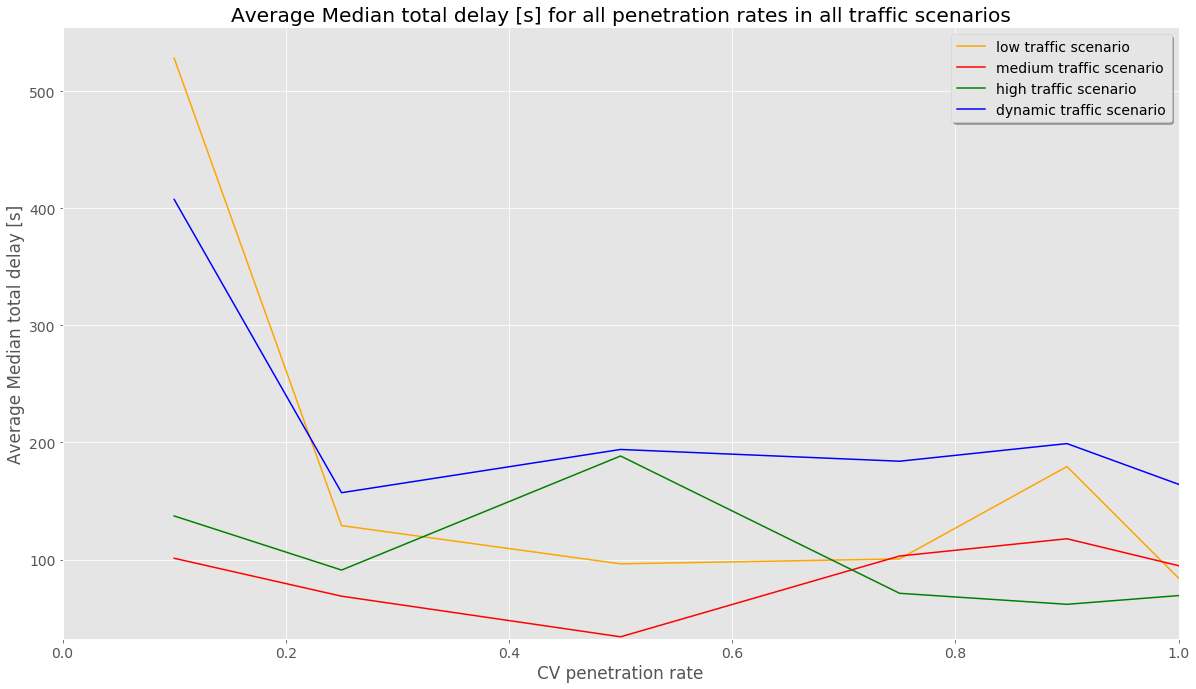

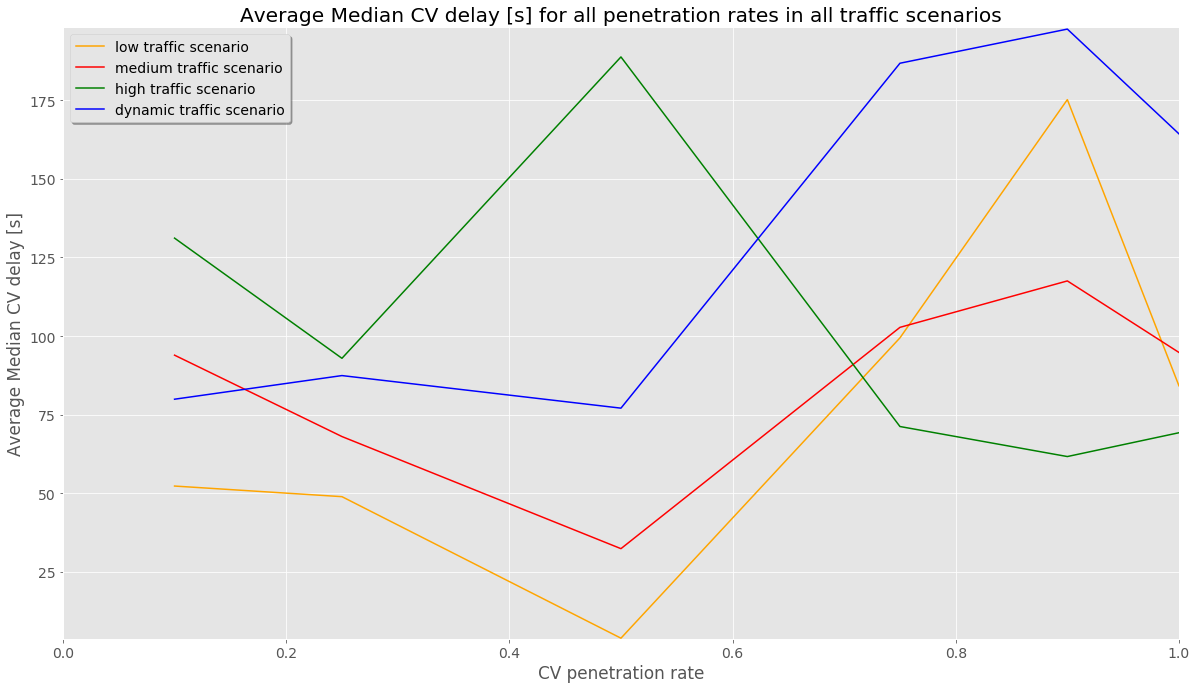

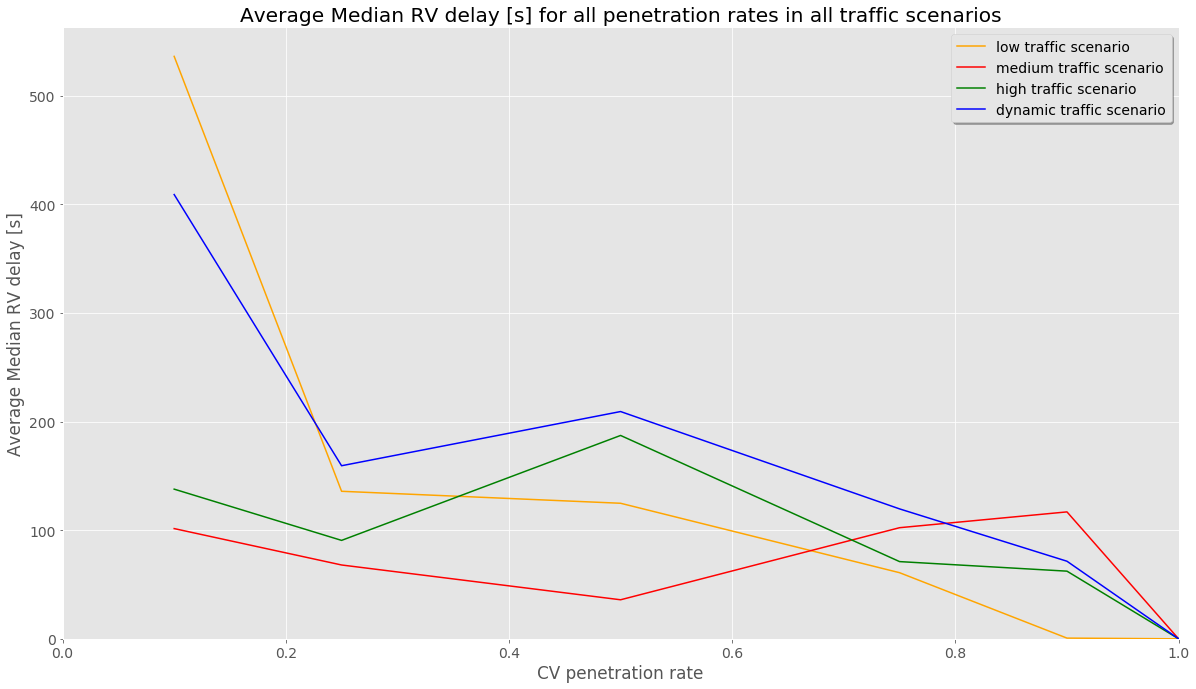

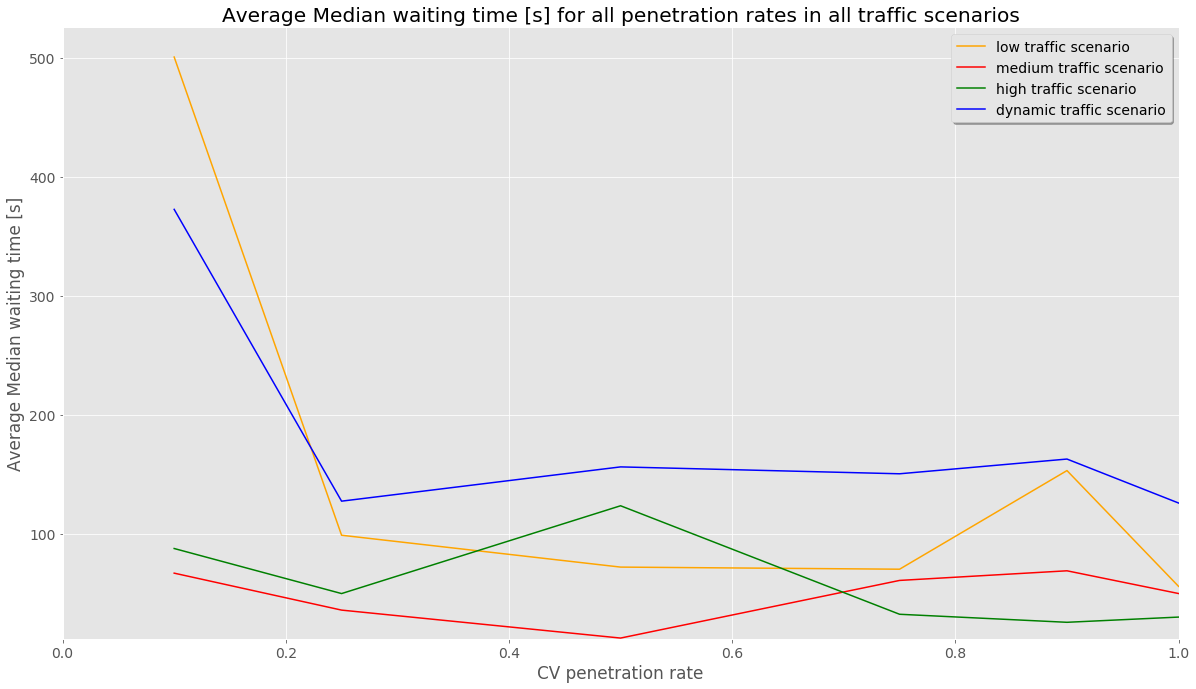

In [24]:
KPI = ['queue', 'delay', 'CV_delay', "RV_delay", 'wait']

for k in KPI:
    penetration_rate_curve_plots(k)

In [31]:
# COMPARE DELAY TOTAL, CV AND RV

def compare_delays(scenario):
    total_delay = []
    CV_delay = []
    RV_delay = []

    p_rates = [0.1, 0.25, 0.5, 0.75, 0.9, 1.0]

    if scenario == 0:
        s_type = "low traffic scenario"
    elif scenario == 1:
        s_type = "medium traffic scenario"
    elif scenario == 2:
        s_type = "high traffic scenario"
    elif scenario == 3:
        s_type = "dynamic traffic scenario"
    else:
        s_type = None


    for p in p_rates:
        total_delay.append(get_run_average(p, scenario, 'delay'))
        CV_delay.append(get_run_average(p, scenario, 'CV_delay'))
        RV_delay.append(get_run_average(p, scenario, 'RV_delay'))
    


    # PLOT ALL SEVEN MODELS TOGETHER
    plt.style.use('ggplot')
    plt.rcParams.update({'font.size': 14})  # set bigger font size
    fig, ax = plt.subplots()
    plt.title("Average delay for all penetration rates in the " + s_type)


    plt.plot(p_rates, total_delay, c='black', label="Delay all vehicles", marker='o')
    plt.plot(p_rates, CV_delay, c='blue', label="Delay of connected vehicles", marker='o')
    plt.plot(p_rates[:-1], RV_delay[:-1], c='red', label="Delay of regular vehicles", marker='o')
    
    #fixed-time
    mean_fixed = np.mean(load_fixed_time(scenario, "\plot_average_delay_data.csv", 0))
    plt.plot(p_rates, [mean_fixed] * len(p_rates),  c='green', label = "Fixed time controller", marker='o')


    legend = ax.legend(loc='best', shadow=True, fontsize='medium')
    plt.xlabel('CV penetration rate')
    plt.ylabel('Average median delay')

    plt.margins(0)

    min_val = min(min(total_delay), min(CV_delay), min(RV_delay))
    max_val = max(max(total_delay), max(CV_delay), max(RV_delay))

    plt.xlim(0, 1)
    plt.ylim(min_val - 0.05 * abs(min_val), max_val + 0.05 * abs(max_val))
    fig = plt.gcf()
    fig.set_size_inches(20, 11.25)
    plt.show()


    save_file = r"/Users/Chantal/Documents/Deep-QLearning-Agent-for-Traffic-Signal-Control/result_tests_28-30-31-32-33-34/compareDelays_plot_scenario_"+ \
                str(scenario)+".png"
    fig.savefig(save_file)


    
    



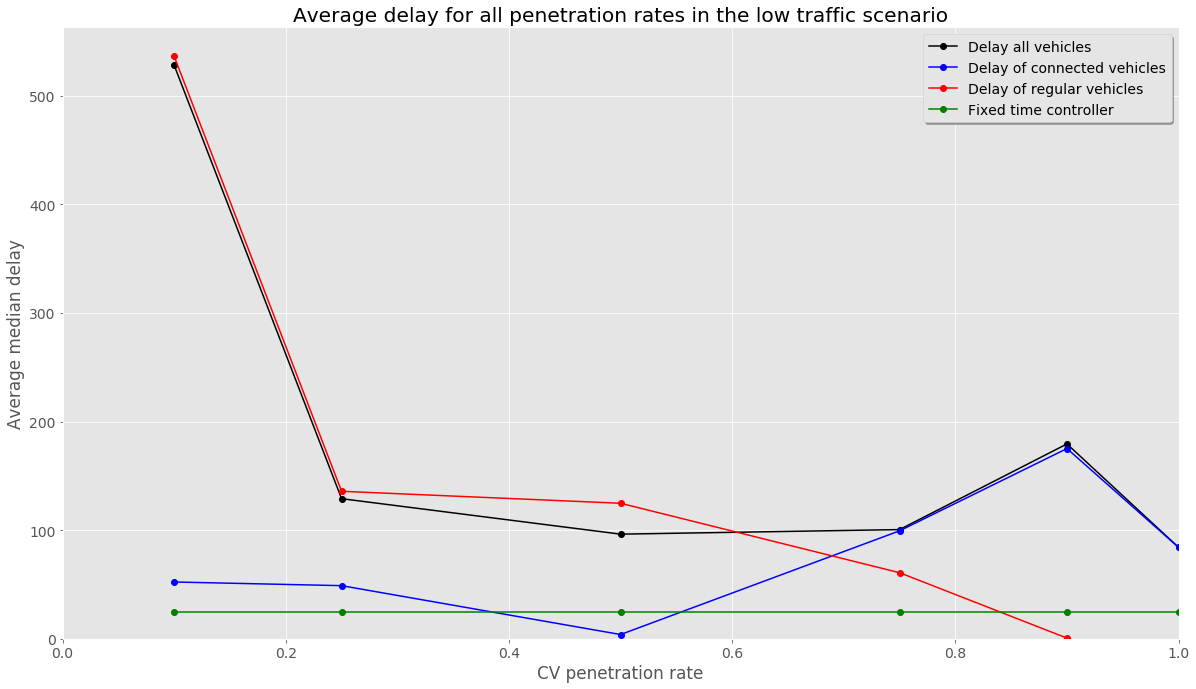

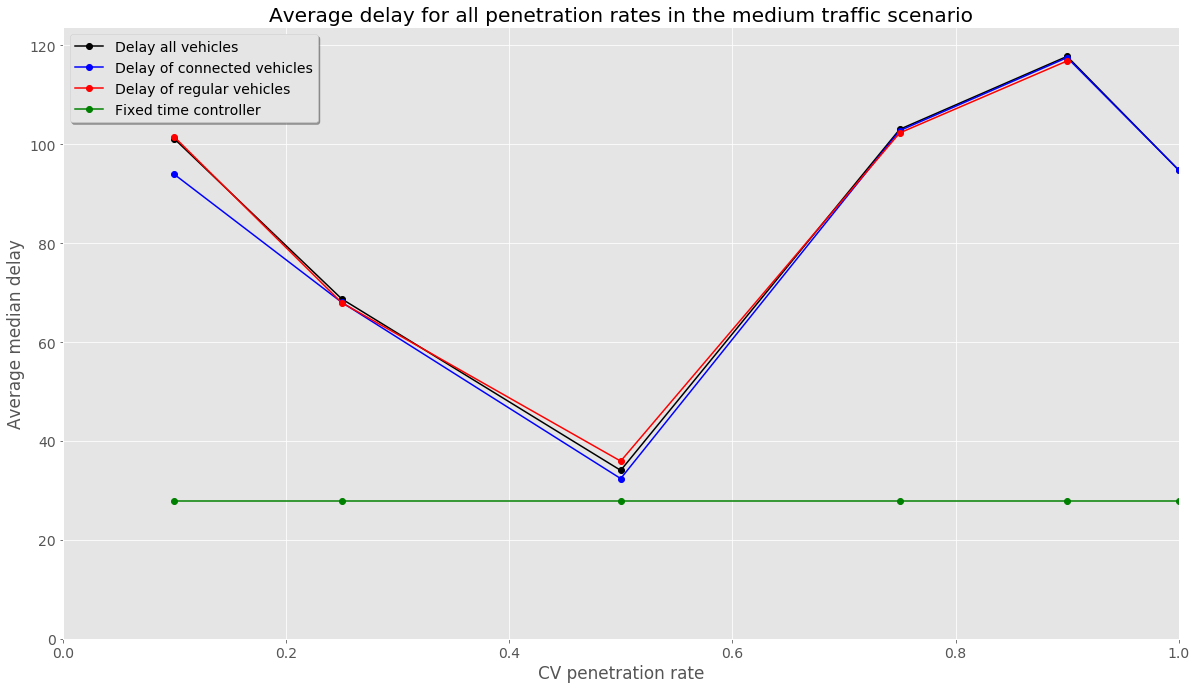

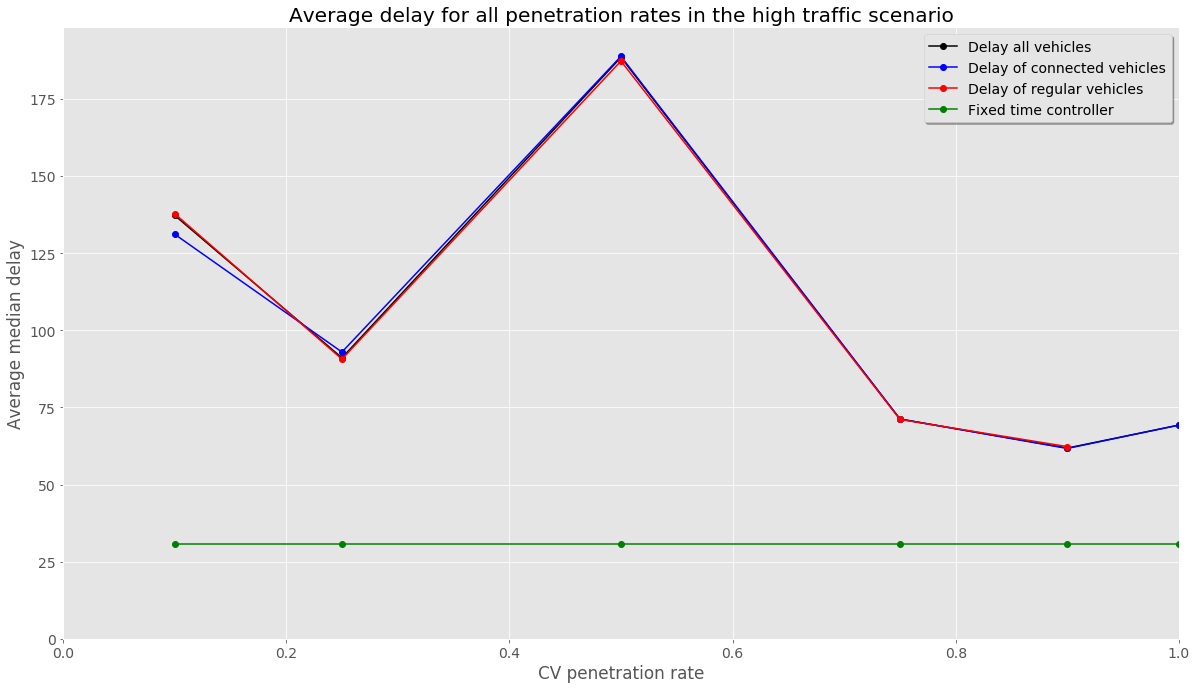

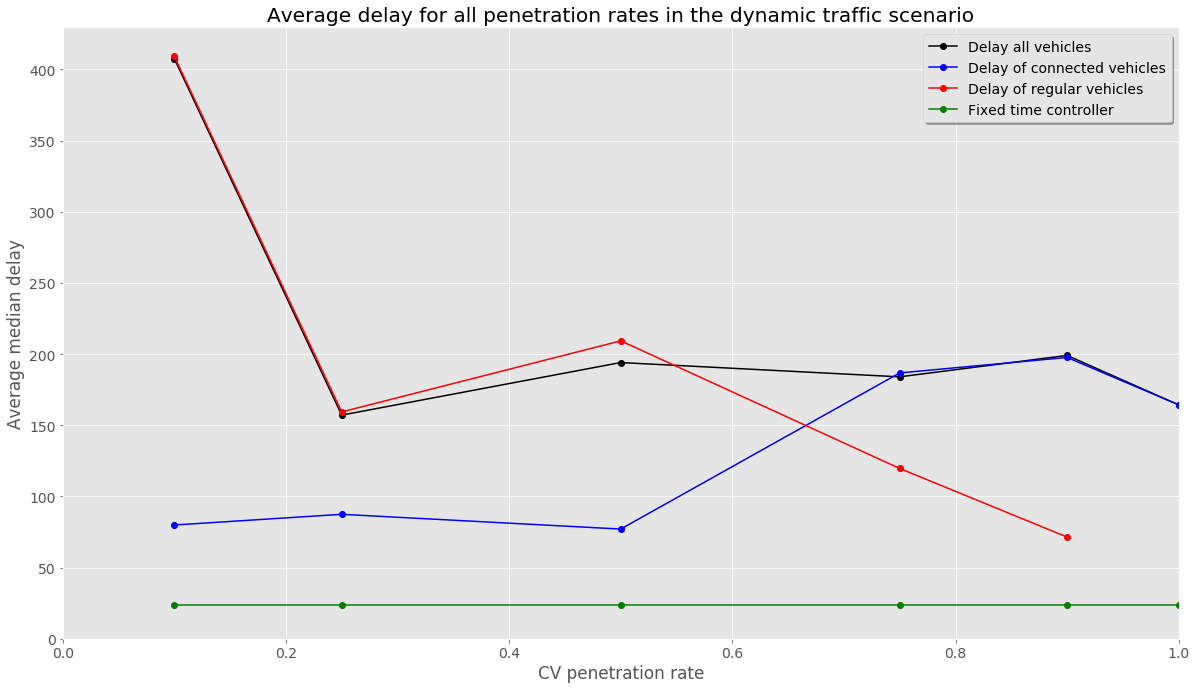

In [32]:
for scenario in range(4):
    compare_delays(scenario)